# Diabetes Detection Using Bagiing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df[['DiabetesPedigreeFunction', 'Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [4]:
X.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.627,148,33.6,50
1,0.351,85,26.6,31
2,0.672,183,23.3,32
3,0.167,89,28.1,21
4,2.288,137,43.1,33


In [5]:
X.shape

(768, 4)

In [6]:
y.shape

(768,)

In [7]:
y.value_counts()/768

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_sc = StandardScaler()

In [10]:
X = X_sc.fit_transform(X)

In [11]:
X = pd.DataFrame(data=X, columns=['DiabetesPedigreeFunction', 'Glucose', 'BMI', 'Age'])

In [12]:
X.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.468492,0.848324,0.204013,1.425995
1,-0.365061,-1.123396,-0.684422,-0.190672
2,0.604397,1.943724,-1.103255,-0.105584
3,-0.920763,-0.998208,-0.494043,-1.041549
4,5.484909,0.504055,1.409746,-0.020496


## Devide Train Test Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

***

# Model Performance

## Performance function

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Designing Model

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [59]:
bag_clf = BaggingClassifier(base_estimator=SVC(degree=2, C = 4.0), n_estimators=150)

In [60]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train = True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.8192

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.91      0.87       401
          1       0.79      0.65      0.71       213

avg / total       0.82      0.82      0.81       614
 

Confusion Metrics : 
 [[364  37]
 [ 74 139]] 

Average Accuracy : 0.7639

Accuracy SD : 0.0339

Test Result : 

Accuracy Score 0.7922

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.86      0.84        99
          1       0.73      0.67      0.70        55

avg / total       0.79      0.79      0.79       154


Confusion Metrics : 
 [[85 14]
 [18 37]] 



## Boosting

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=3), n_estimators=100, learning_rate=3)

In [88]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=3, n_estimators=100, random_state=None)

In [89]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train = True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.7720

Classification Report : 
              precision    recall  f1-score   support

          0       0.87      0.76      0.81       401
          1       0.64      0.79      0.71       213

avg / total       0.79      0.77      0.78       614
 

Confusion Metrics : 
 [[305  96]
 [ 44 169]] 

Average Accuracy : 0.6759

Accuracy SD : 0.0598

Test Result : 

Accuracy Score 0.6688

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.67      0.72        99
          1       0.53      0.67      0.59        55

avg / total       0.69      0.67      0.68       154


Confusion Metrics : 
 [[66 33]
 [18 37]] 



In [25]:
from sklearn.metrics import roc_curve

In [96]:
y_scores = cross_val_predict(ada_clf, X_train, y_train, cv=3, method='decision_function')

In [97]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [98]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

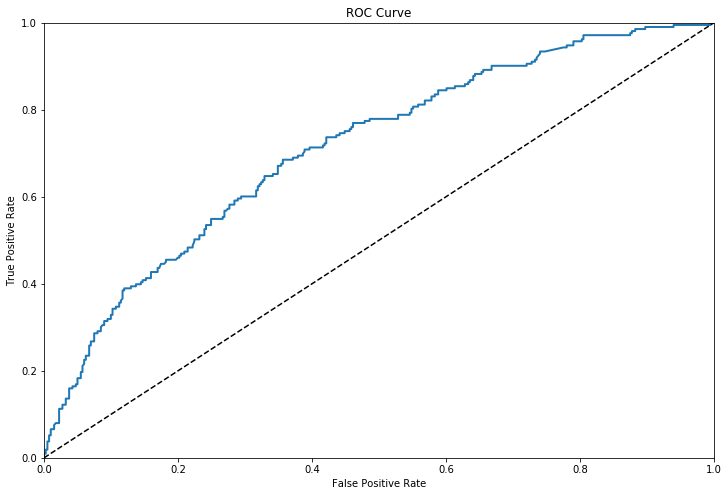

0.711741772329739

In [99]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

In [90]:
y_scores = cross_val_predict(bag_clf, X_train, y_train, cv=3, method='decision_function')

In [91]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

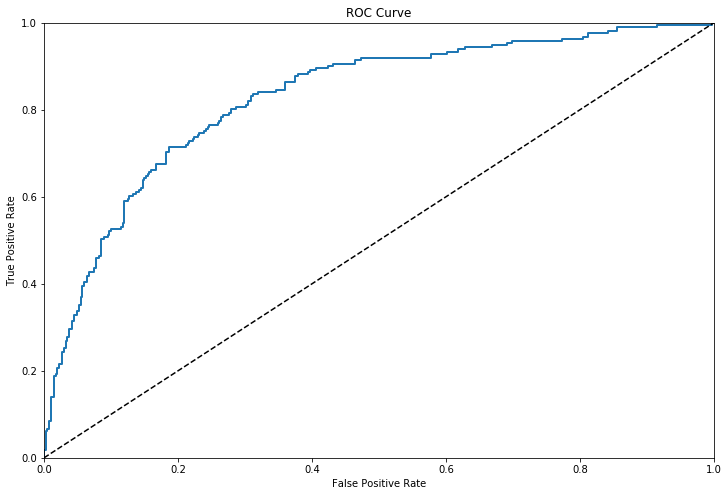

0.8278013885474108

In [94]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

## Grid Search On Bagging

In [33]:
from sklearn.model_selection import GridSearchCV

In [62]:
params = {'n_estimators' : [100, 150, 200],
          'max_samples': range(1,5),
          'max_features': range(1,3)}

In [63]:
grid_clf = GridSearchCV(bag_clf, param_grid=params, n_jobs=-1)

In [64]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_samples': range(1, 5), 'max_features': range(1, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_clf.best_score_

0.757328990228013

In [65]:
grid_clf.best_estimator_

BaggingClassifier(base_estimator=SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=2,
         max_samples=4, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)